<a href="https://colab.research.google.com/github/nmningmei/Deep_learning_fMRI_EEG/blob/master/8_2_extract_representations_from_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download the Fast Text Model from its official website: [click me](https://fasttext.cc/docs/en/crawl-vectors.html). This will take up to 10 minutes

In [0]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz

--2019-11-28 09:09:06--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.es.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:16a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1285580896 (1.2G) [binary/octet-stream]
Saving to: ‘cc.es.300.vec.gz’

cc.es.300.vec.gz    100%[===================>]   1.20G  11.3MB/s    in 1m 48s  

2019-11-28 09:10:56 (11.3 MB/s) - ‘cc.es.300.vec.gz’ saved [1285580896/1285580896]



In [0]:
!ls

adc.json  cc.es.300.vec.gz  sample_data


# Load the structural pretrained model

```
For .bin use: load_fasttext_format() (this typically contains full model with parameters, ngrams, etc).

For .vec use: load_word2vec_format (this contains ONLY word-vectors -> no ngrams + you can't update an model).
```

Here we use `gensim` to load the model into a quasi-dictionary object <-- learn this concept from the python course on Thursdays

In [0]:
from gensim.models.keyedvectors import KeyedVectors # for loading word2vec models

In [0]:
print('loading model, and it is going to take some time...')
model_word2vec = KeyedVectors.load_word2vec_format('cc.es.300.vec.gz')

loading model, and it is going to take some time...


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Get the representation of the word "brain"

In [0]:
model_word2vec.get_vector('y')

array([-0.116 , -0.0598, -0.0966,  0.0369, -0.0063,  0.0431, -0.0948,
       -0.002 , -0.021 , -0.0355,  0.0725, -0.0989,  0.0568, -0.0541,
        0.0738, -0.0101, -0.0761, -0.0311,  0.0419,  0.0468, -0.0209,
        0.0559, -0.0044,  0.1227, -0.0087, -0.1245, -0.0167, -0.0167,
       -0.1545,  0.0504,  0.0454,  0.0857, -0.0639, -0.0072,  0.0372,
        0.0298, -0.014 , -0.0345,  0.1021, -0.0173, -0.0579,  0.093 ,
        0.0577,  0.0154, -0.0455, -0.0213,  0.2565,  0.0317, -0.0917,
       -0.1923,  0.0311, -0.0165, -0.2472,  0.0396, -0.0199, -0.2148,
       -0.0042, -0.0116,  0.052 ,  0.1654,  0.0458,  0.0128,  0.0124,
        0.0931,  0.1343, -0.1245,  0.0189,  0.4718,  0.0153, -0.0539,
        0.1035, -0.053 ,  0.0355, -0.0018,  0.0642,  0.0174, -0.1739,
        0.0284,  0.0046,  0.132 ,  0.0141, -0.0347, -0.0115, -0.0606,
       -0.0092,  0.1209,  0.012 ,  0.0013, -0.0975,  0.091 , -0.0725,
        0.0403,  0.0088,  0.0513, -0.017 , -0.0141,  0.0226, -0.0544,
       -0.1995,  0.2

In [0]:
model_word2vec.most_similar(positive = 'y',topn = 20)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(',', 0.7631832957267761),
 (';', 0.6005135178565979),
 ('o', 0.5968451499938965),
 ('Y', 0.544538140296936),
 ('no', 0.5042771697044373),
 ('านให', 0.5034225583076477),
 ('องบ', 0.4950715899467468),
 ('(', 0.49505361914634705),
 (',y', 0.49227309226989746),
 ('es', 0.48422542214393616),
 ('दी', 0.4832378625869751),
 ('Ӝ', 0.48178961873054504),
 ('ni', 0.4797552824020386),
 ('me', 0.47736072540283203),
 ('yy', 0.47375720739364624),
 ('de', 0.47217339277267456),
 ('ya', 0.4701370596885681),
 ('ру', 0.4699912667274475),
 ('๑๑', 0.46987250447273254),
 ('se', 0.4686737358570099)]

In [0]:
# Let's look our 36 living -- nonliving words

In [0]:
words_id = 'https://drive.google.com/open?id=18nfVy-o0GWX-QKEWrKK0EKLLAltpFy4U'.split('id=')[-1]
downloaded = drive.CreateFile({'id':words_id})
downloaded.GetContentFile(f'words.npy')

In [0]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

In [0]:
words = np.load('words.npy')

In [0]:
words

array([b'llave', b'lapiz', b'tijera', b'aguja', b'pinza', b'sierra',
       b'clavo', b'pincel', b'alicate', b'tuerca', b'navaja', b'cepillo',
       b'taladro', b'soplete', b'tornillo', b'cuchara', b'martillo',
       b'cuchillo', b'tigre', b'gallo', b'perro', b'oveja', b'cerdo',
       b'gorila', b'burro', b'yegua', b'ardilla', b'conejo', b'gallina',
       b'caballo', b'ballena', b'pantera', b'camello', b'tortuga',
       b'elefante', b'canguro'], dtype='|S8')

# Let's plot the dissimilarity among the words

In [0]:
# get the word categories
word_type = {word:(ii<len(words)/2) for ii,word in enumerate(words)}
# map on to the semantic categories
word_type_map = {True:'animal',False:'tool'}
# make classification labels
labelize_map = {'animal':0,'tool':1}
# get the features extracted by the model
data,labels = [],[]
label2word = np.array(words)
for word in words:
    temp_vec = model_word2vec.get_vector(
            word.decode('UTF-8') # since the word loaded in a sequence of octets, aka btypes, we need to convert it back to string type
            )
    data.append(temp_vec)
    labels.append(labelize_map[word_type_map[word_type[word]]])
data = np.array(data)
labels = np.array(labels)

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2,random_state = 12345)
kmeans.fit(data)
kmeans.cluster_centers_.shape

(2, 300)

In [0]:
kmeans.labels_,labels

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

## Keep in mind that we have to perform some kind of normalization of the word-vectors to account for the multiple comparison

/usr/local/lib/python3.6/dist-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


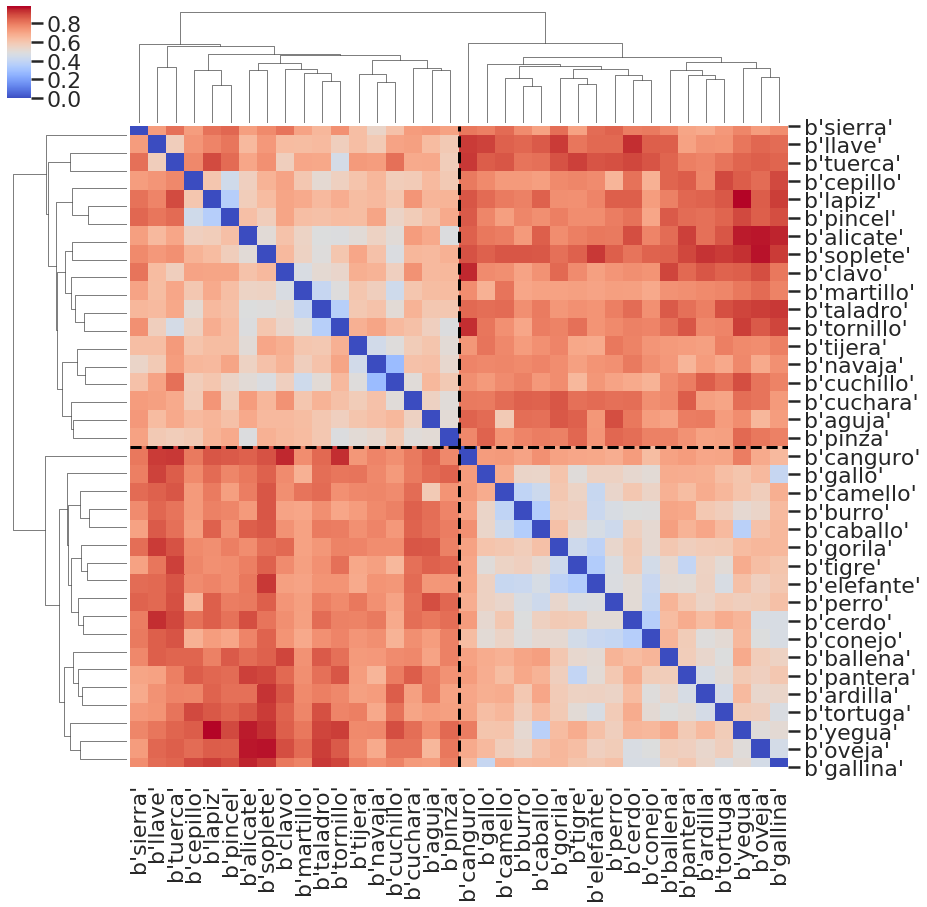

In [0]:
dissimilarity = distance.squareform(distance.pdist(
    data - data.mean(1).reshape(-1,1), # normalize the representation for each of the word
    metric='cosine'))
# if you want to use seaborn.clustermap, don't run the next line
# np.fill_diagonal(dissimilarity,np.nan)
dissimilarity = pd.DataFrame(dissimilarity,columns=words)
dissimilarity.index = words
g = sns.clustermap(dissimilarity,
                xticklabels = True,
                yticklabels = True,
                figsize = (14,14),
                cmap = plt.cm.coolwarm)
g.fig.axes[2].axhline(36 / 2,linestyle = '--', color = 'black', alpha = 1.)
g.fig.axes[2].axvline(36 / 2,linestyle = '--', color = 'black', alpha = 1.)

In [0]:
dissimilarity = distance.squareform(distance.pdist(
    data - data.mean(1).reshape(-1,1), # normalize the representation for each of the word
    metric='cosine'))
# if you want to use seaborn.clustermap, don't run the next line
np.fill_diagonal(dissimilarity,np.nan)
dissimilarity = pd.DataFrame(dissimilarity,columns=words)
dissimilarity.index = words

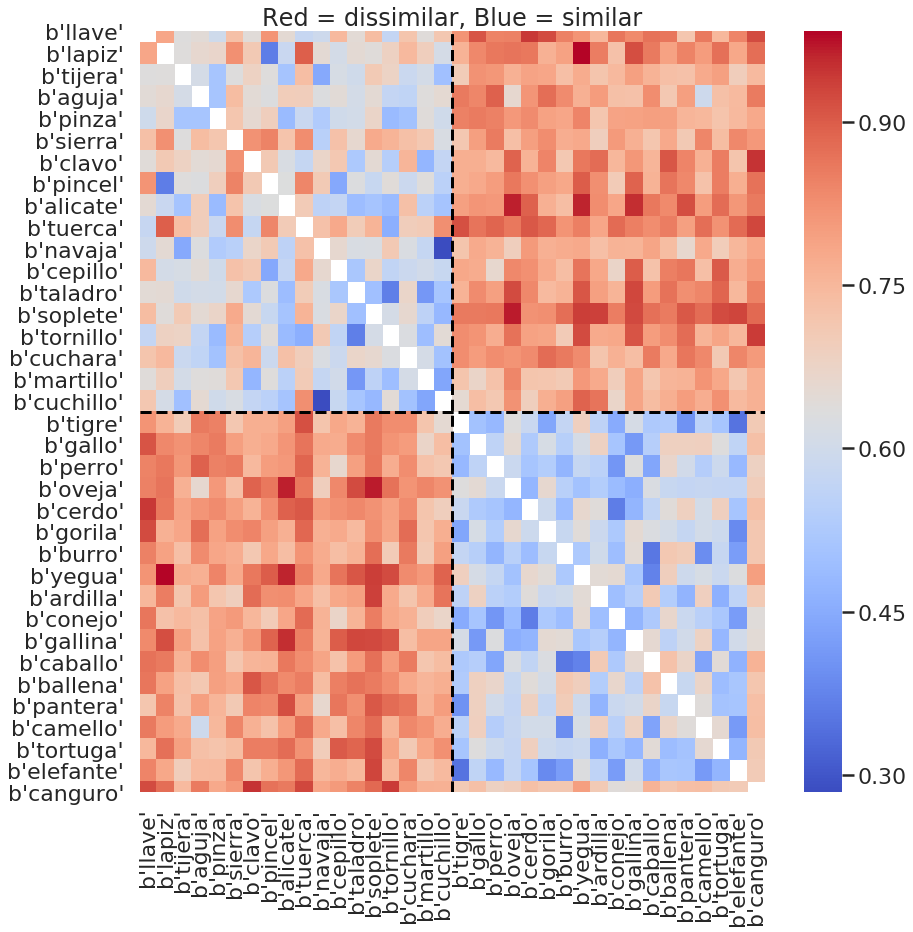

In [0]:
fig,ax = plt.subplots(figsize = (14,14))
ax = sns.heatmap(dissimilarity,
                 xticklabels = True,
                 yticklabels = True,
                 ax = ax,
                 cmap = plt.cm.coolwarm,)
_ = ax.set(title = 'Red = dissimilar, Blue = similar')
ax.axhline(36 / 2,linestyle = '--', color = 'black', alpha = 1.)
ax.axvline(36 / 2,linestyle = '--', color = 'black', alpha = 1.)

# Use machine learning to demostrate the robustness of the clustering

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeavePOut, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [0]:
features = data.copy()
labels = np.array([labelize_map[word_type_map[word_type[word]]] for word in words])
groups = words.copy()
cv = LeavePOut(p = 2)
results = dict(
                fold = [],
                score = [],
                test_word1 = [],
                test_word2 = [],
                )
for fold, (idx_train,idx_test) in enumerate(cv.split(features,labels,groups = groups)): 
    X_train,y_train = features[idx_train],labels[idx_train]
    X_test,y_test = features[idx_test],labels[idx_test]
    X_train,y_train = shuffle(X_train,y_train)
    test_pairs = groups[idx_test]
    clf = make_pipeline(StandardScaler(),LogisticRegression(solver='liblinear',random_state=12345))
    clf.fit(X_train,y_train)
    preds = clf.predict_proba(X_test)[:,-1]
    score = np.abs(preds[0] - preds[1])
    results['fold'].append(fold + 1)
    results['score'].append(score)
    results['test_word1'].append(test_pairs[0].decode('UTF-8'))
    results['test_word2'].append(test_pairs[1].decode('UTF-8'))
results_to_save = pd.DataFrame(results)

In [0]:
results_to_save

,fold,score,test_word1,test_word2
0,1,0.000887,llave,lapiz
1,2,0.008585,llave,tijera
2,3,0.000673,llave,aguja
3,4,0.000165,llave,pinza
4,5,0.226458,llave,sierra
...,...,...,...,...
625,626,0.015879,camello,elefante
626,627,0.075958,camello,canguro
627,628,0.001491,tortuga,elefante
628,629,0.080670,tortuga,canguro


In [0]:
idx_map = {word.decode('UTF-8'):idx for idx,word in enumerate(words)}

In [0]:
decode_distance = np.zeros((36,36))
for ii,row in results_to_save.iterrows():
    decode_distance[idx_map[row['test_word1']],
                    idx_map[row['test_word2']]] = row['score']
    decode_distance[idx_map[row['test_word2']],
                    idx_map[row['test_word1']]] = row['score']
np.fill_diagonal(decode_distance,np.nan)

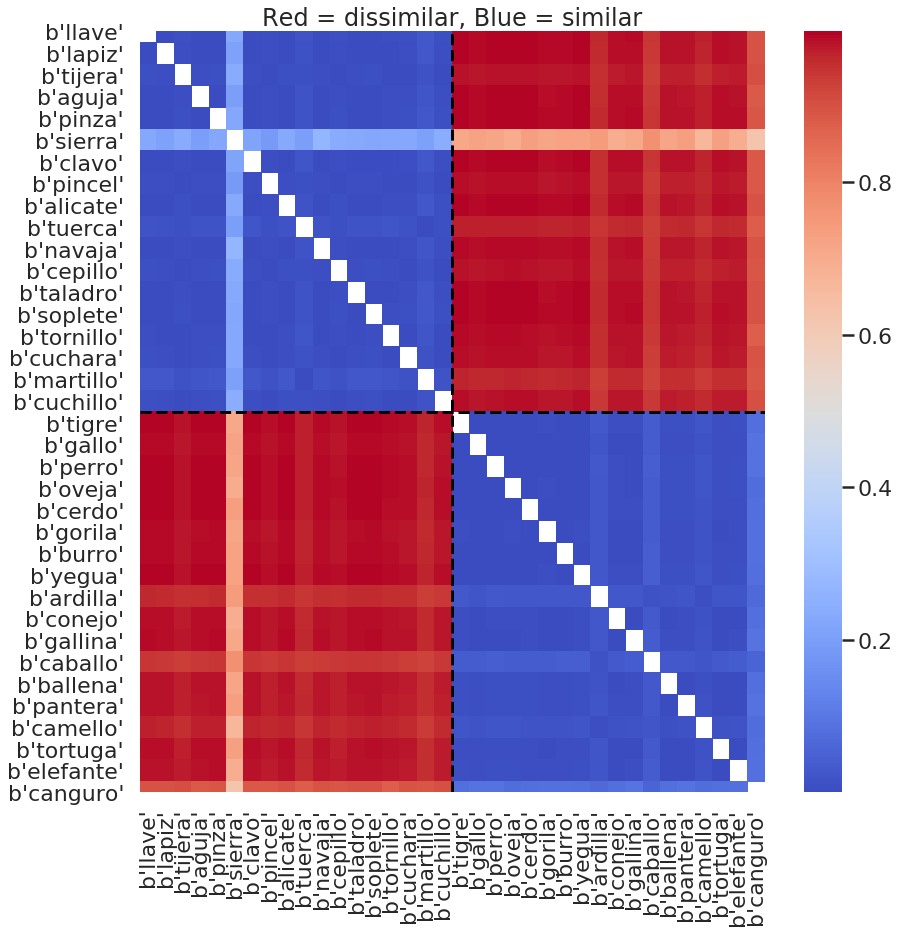

In [0]:
decode_distance = pd.DataFrame(decode_distance,index = words,columns=words)
fig,ax = plt.subplots(figsize = (14,14))
ax = sns.heatmap(decode_distance,
                 xticklabels = True,
                 yticklabels = True,
                 ax = ax,
                 cmap = plt.cm.coolwarm,)
_ = ax.set(title = 'Red = dissimilar, Blue = similar')
ax.axhline(36 / 2,linestyle = '--', color = 'black', alpha = 1.)
ax.axvline(36 / 2,linestyle = '--', color = 'black', alpha = 1.)

# Fit an encoding model to predict the BOLD signals given the words

In [0]:
BOLD_id = 'https://drive.google.com/open?id=1d4y-6myFog7h7V_Z-3-cepM-v0gmbTQL'.split('id=')[-1]
downloaded = drive.CreateFile({'id':BOLD_id})
downloaded.GetContentFile(f'lh_fusif.npy')

event_id = 'https://drive.google.com/open?id=1MuwdvHX20OtStLqhDO1eIlHpUMA-oYgX'.split('id=')[-1]
downloaded = drive.CreateFile({'id':event_id})
downloaded.GetContentFile(f'lh_fusif.csv')

In [0]:
from sklearn                   import linear_model,metrics
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing     import StandardScaler
from sklearn.model_selection   import GroupShuffleSplit,cross_validate
from collections               import defaultdict

In [0]:
fmri_data_ = np.load("lh_fusif.npy")
df_data_ = pd.read_csv('lh_fusif.csv')
word2vec_vec = pd.DataFrame(data.T,columns = words)

In [0]:
def add_track(df_sub):
    n_rows = df_sub.shape[0]
    temp = '+'.join(str(item + 10) for item in df_sub['index'].values)
    df_sub = df_sub.iloc[1,:].to_frame().T
    df_sub['n_volume'] = n_rows
    df_sub['time_indices'] = temp
    return df_sub
def groupby_average(fmri,df,groupby = ['trials']):
    BOLD_average = np.array([np.mean(fmri[df_sub.index],0) for _,df_sub in df.groupby(groupby)])
    df_average = pd.concat([add_track(df_sub) for ii,df_sub in df.groupby(groupby)])
    return BOLD_average,df_average

In [0]:
label_map               = dict(animal  =[1,0],
                               tool    =[0,1])
for condition in ['read','reenact']:
    # pick condition
    idx_pick        = df_data_['context'] == condition
    fmri_data       = fmri_data_[idx_pick]
    df_data         = df_data_[idx_pick]

    fmri_data,df_data   = groupby_average(fmri_data,
                                          df_data.reset_index(),
                                          groupby = ['id'])
    df_data             = df_data.reset_index()

    # something we need for defining the cross validation method
    BOLD    = fmri_data.copy()
    targets = np.array([label_map[item] for item in df_data['targets'].values])
    groups  = df_data['words'].values

    # to remove the low variant voxels and standardize the BOLD signal
    variance_threshold      = VarianceThreshold()
    BOLD                    = variance_threshold.fit_transform(BOLD)
    scaler                  = StandardScaler()
    BOLD                    = scaler.fit_transform(BOLD)

    embedding_features  = np.array([word2vec_vec[word.lower().encode()] for word in df_data['words']])

    # define the cross validation strategy
    
    cv = GroupShuffleSplit(n_splits      = 100,
                            test_size    = 0.2,
                            random_state = 12345)
    idxs_train,idxs_test = [],[]
    for idx_train,idx_test in cv.split(BOLD,targets,groups=groups):
        idxs_train.append(idx_train)
        idxs_test.append(idx_test)
    
    # define the encoding model
    encoding_model      = linear_model.Ridge(
                            alpha                       = 100,          # L2 penalty, higher means more weights are constrained to zero
                            normalize                   = True,         # normalize the batch features
                            random_state                = 12345,        # random seeding
                            )
    # black box cross validation
    res                 = cross_validate(
                            encoding_model,
                            embedding_features,
                            BOLD,
                            groups                      = groups,
                            cv                          = zip(idxs_train,idxs_test),
                            n_jobs                      = 8,
                            return_estimator            = True,)
    
    n_coef          = embedding_features.shape[1]
    n_obs           = int(embedding_features.shape[0] * 0.8)
    preds           = np.array([model.predict(embedding_features[idx_test]) for model,idx_test in zip(res['estimator'],idxs_test)])
    scores          = np.array([metrics.r2_score(BOLD[idx_test],y_pred,multioutput = 'raw_values') for idx_test,y_pred in zip(idxs_test,preds)])
    mean_variance   = np.array([np.mean(temp[temp >= 0]) for temp in scores])
    positive_voxels = np.array([np.sum(temp >= 0) for temp in scores])
    corr            = [np.mean([np.corrcoef(a,b).flatten()[1] for a,b in zip(BOLD[idx_test],pred)]) for idx_test,pred in zip(idxs_test,preds)]
    # saving the results
    results                     = defaultdict()
    results['condition'        ]= [condition] * 100
    results['fold'             ]= np.arange(100) + 1
    results['positive voxels'  ]= positive_voxels
    results['mean_variance'    ]= mean_variance
    results['corr'             ]= corr
    results_to_save = pd.DataFrame(results)
    results_to_save.to_csv(f'{condition}.csv',index = False)

    print('fast text --> BOLD @ left-fusiform',f'{condition:8s}, mean variance explained = {mean_variance.mean():.4f} with {n_obs} instances of {n_coef} features that explains {positive_voxels.mean():.2f} positive voxels')

fast text --> BOLD @ left-fusiform read    , mean variance explained = 0.0053 with 201 instances of 300 features that explains 330.62 positive voxels
fast text --> BOLD @ left-fusiform reenact , mean variance explained = 0.0070 with 201 instances of 300 features that explains 416.38 positive voxels
